# Data Mining Lab #2: Report's Kaggle Competition

## Student Information

Name: Karin Thawornskulchai

Student ID: 109065710

GitHub ID: K4rinT

Kaggle Name: K4rinT (in Scoreboard name: 辣油)

Kaggle Private Scoreboard Snapshot:
![](../pic0.png)

### Table of Contents

1. DataPreparation
2. Feature Engineering
3. Model
4. Results Evaluation
5. Conclusion

---
# 0. Environment checked
Before begin at Data Preparation, we have to know the working directory for importing data to our sheets.

Let's begin!

In [51]:
import os

cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))
print(os.listdir("../dm2022-isa5810-lab2-homework"))

Current working directory: /Users/karin/Desktop/Kaggle/dm2022-isa5810-lab2-homework
['tweet_DM.pkl', 'submit_N.csv', '.DS_Store', 'emotion.csv', 'train_df.pkl', 'tweet_emo.pkl', 'sampleSubmission.csv', 'fast_train.txt', 'test_prep_df_df.pkl', 'DM2022 ISA5810 Lab2 Competition.ipynb', 'submit_fast_N.csv', 'submit.csv', 'Data Description.xlsx', 'test_fulltext.txt', 'train_prep_df_df.pkl', '~$Data Description.xlsx', 'data_identification.csv', 'tweets_DM.json', 'Window', 'DecisionTree_model.joblib', 'tweet_ident.pkl', 'submit_NN.csv', 'MultinomialNB_model.joblib', 'test_fasttext.txt', 'tweet_df.pkl', 'DM2022 ISA5810 Lab2 Competition_20221120.ipynb', 'train_fulltext.txt', 'submit_fast_NN.csv', 'test_df.pkl', '.idea']


---
# 1. Data Preparation
Before beginning the lab, this competition use dataset which was crawled from Twitter. Dataset already labeled the emotion, there are 8 classes (emotion) in this dataset such as 'anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust' and 'joy'

__Acknowledgement__
Thank you IDEA lab for providing this dataset.



## 1.1 Load data
We start by loading .csv files and .json file for training and testing in our sheets.

Dataset Description in each of data
- tweets_DM.json : Raw data from twitter.
- emotion.csv : Lists the emotion labels per tweet_id
- data_identification.csv : A file that identifies to membership of training or testing set per tweet_id.
- sampleSubmission.csv: A submission format you should follow for submitting to the competition.

__** Note **__  In data_identification.csv, for the testing set we have to predict these when to submit in the Kaggle.

In [48]:
# - Import library - #
import pandas as pd

# - Load Raw data - #
tweet_DM = pd.read_json("../dm2022-isa5810-lab2-homework/tweets_DM.json", lines = True)

tweet_emo = pd.read_csv("../dm2022-isa5810-lab2-homework/emotion.csv", sep = ',', header = 0, names = ['tweet_id', 'emotion'])

tweet_ident = pd.read_csv("../dm2022-isa5810-lab2-homework/data_identification.csv", sep = ',', header = 0, names = ['tweet_id', 'identification'])

### Save data (Raw Data)
We will save our raw data in Pickle format because our twitter data is huge, it could use less space to store also consumes less loading time.

In [49]:
# - Save to pickle file - #
import pandas as pd

tweet_DM.to_pickle('tweet_DM.pkl')
tweet_emo.to_pickle('tweet_emo.pkl')
tweet_ident.to_pickle('tweet_ident.pkl')

In [50]:
# - Load pickle file - #

tweet_DM = pd.read_pickle('tweet_DM.pkl')
tweet_emo = pd.read_pickle('tweet_emo.pkl')
tweet_ident = pd.read_pickle('tweet_ident.pkl')


### Prepared the data format
After seeing the tweet_DM dataframe, we find out that data that we want to focus are in the _source column. To easily seeing the data inside this column, we split the data inside _source column that we focus into new column, for the data that we focus are 'tweet_id', 'text', and 'hashtags'.

In [52]:
# - Create new columns for the dataset that we focus in tweet_DM - #
# x[2]: Access _source column and iterate through each row (axis = 1) #

tweet_DM['tweet_id'] = tweet_DM.apply(lambda x: x[2]['tweet']['tweet_id'], axis = 1)
tweet_DM['text'] = tweet_DM.apply(lambda x: x[2]['tweet']['text'], axis = 1)
tweet_DM['hashtags'] = tweet_DM.apply(lambda x : x[2]['tweet']['hashtags'], axis = 1)


In [53]:
# - Show tweet_DM dataframe - #

tweet_DM

,_score,_index,_source,_crawldate,_type,tweet_id,text,hashtags
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat]
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]"
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,0x28b412,"Confident of your obedience, I write to you, k...",[bibleverse]
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[]
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,0x2de201,"""Trust is not the same as faith. A friend is s...",[]
...,...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,0x316b80,When you buy the last 2 tickets remaining for ...,"[mixedfeeling, butimTHATperson]"
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,0x29d0cb,I swear all this hard work gone pay off one da...,[]
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,[]
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,0x24faed,"Ah, corporate life, where you can date <LH> us...",[]


In [54]:
# - Create new dataframe name 'tweet_df' which will only contain data that we focused - #
# Data that we focus are 'tweet_id', 'text' and 'hashtags' #

tweet_df = tweet_DM[['tweet_id', 'text', 'hashtags']]
tweet_df

,tweet_id,text,hashtags
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat]
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]"
2,0x28b412,"Confident of your obedience, I write to you, k...",[bibleverse]
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[]
4,0x2de201,"""Trust is not the same as faith. A friend is s...",[]
...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,"[mixedfeeling, butimTHATperson]"
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,[]
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,[]
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",[]


### Save Data (Focus data)
Save data that split from 'tweet_DM.csv' into pickle format

In [55]:
# tweet_df #
# Save and Load data in pickle format #

tweet_df.to_pickle('tweet_df.pkl')
tweet_df = pd.read_pickle('tweet_df.pkl')

### Prepared train & test dataset
We will prepare the test & test dataset.

Let's begin!

### Merge the dataframe together
 We will merge the "tweet_emo" dataframe and "tweet_ident" dataframe into "tweet_df" dataframe from the previous step.

In [56]:
# - Using merge command based on 'tweet_id' column - #

tweet_df = tweet_df.merge(tweet_emo, how = 'left', on = 'tweet_id')
tweet_df = tweet_df.merge(tweet_ident, how = 'left', on = 'tweet_id')

In [57]:
# - Show tweet_df dataframe - #

tweet_df

,tweet_id,text,hashtags,emotion,identification
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat],anticipation,train
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]",sadness,train
2,0x28b412,"Confident of your obedience, I write to you, k...",[bibleverse],NaN,test
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[],fear,train
4,0x2de201,"""Trust is not the same as faith. A friend is s...",[],NaN,test
...,...,...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,"[mixedfeeling, butimTHATperson]",NaN,test
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,[],NaN,test
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,[],NaN,test
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",[],joy,train


### Create train_df dataframe

In [58]:
# - Create the "train_df" dataframe by sorting only identification column - #
# - Only identification == 'train' will stay in this dataframe - #

train_df = tweet_df[tweet_df.identification == 'train']
train_df

,tweet_id,text,hashtags,emotion,identification
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat],anticipation,train
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]",sadness,train
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[],fear,train
5,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,"[authentic, LaughOutLoud]",joy,train
6,0x2c91a8,Still waiting on those supplies Liscus. <LH>,[],anticipation,train
...,...,...,...,...,...
1867526,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,"[NoWonder, Happy]",joy,train
1867527,0x38959e,In every circumtance I'd like to be thankful t...,[],joy,train
1867528,0x2cbca6,there's currently two girls walking around the...,[blessyou],joy,train
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",[],joy,train


### Create test_df dataframe

In [59]:
# - Create the "test_df" dataframe by sorting only identification column - #
# - Only identification == 'test' will stay in this dataframe - #

test_df = tweet_df[tweet_df.identification == 'test']
test_df

,tweet_id,text,hashtags,emotion,identification
2,0x28b412,"Confident of your obedience, I write to you, k...",[bibleverse],NaN,test
4,0x2de201,"""Trust is not the same as faith. A friend is s...",[],NaN,test
9,0x218443,When do you have enough ? When are you satisfi...,"[materialism, money, possessions]",NaN,test
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #...","[GodsPlan, GodsWork]",NaN,test
33,0x26289a,"In these tough times, who do YOU turn to as yo...",[],NaN,test
...,...,...,...,...,...
1867525,0x2913b4,"""For this is the message that ye heard from th...",[],NaN,test
1867529,0x2a980e,"""There is a lad here, which hath five barley l...",[],NaN,test
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,"[mixedfeeling, butimTHATperson]",NaN,test
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,[],NaN,test


### Shuffle Dataset

In [60]:
# Shuffle Dataset #

train_df = train_df.sample(frac = 1)
test_df = test_df.sample(frac = 1)

### Save data (train_df & test_df)

In [61]:
# - Save to pickle file - #

train_df.to_pickle('train_df.pkl')
test_df.to_pickle('test_df.pkl')

In [62]:
# - Load pickle file - #

train_df = pd.read_pickle('train_df.pkl')
test_df = pd.read_pickle('test_df.pkl')

## 1.2 Data Cleaning
Twitter's text data has a lot of unicode string, integer special string to better analyze the data. We have to clean data.

In our data cleaning, we clean data as below.
- Change sentence to lower
- Remove unicode string
- Remove integer in the sentence
- Replace multi-special string such as !!! to !
- Remove stop words of the text
- Stemming >> Word normalization techniques
- Lemmatization >> Word normalization techniques

__** Note **__ : Stemming and Lemmatization can not do together because it's the same word normalization technique as I researched, so I have planned to use Lemmatization because it provides the better result but the drawback is the computation speed is slower than Stemming.

### Create preprocess function

In [63]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def preprocess(doc, stem = True):
    """ Do preprocess with the input document """

    # change sentence to lower #
    doc = doc.lower()

    # remove unicode string #
    doc = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', doc)
    doc = re.sub(r'[^\x00-\x7f]',r'',doc)

    # remove integer #
    doc = ''.join([i for i in doc if not i.isdigit()])

    # replace multi-special string #
    doc = re.sub(r"(\!)\1+", ' multiExclamation ', doc)
    doc = re.sub(r"(\?)\1+", ' multiQuestion ', doc)
    doc = re.sub(r"(\.)\1+", ' multiStop ', doc)

    # tokenize into words #
    words = word_tokenize(doc)

    # remove stop words #
    words = [word for word in words if word not in stopwords.words('english')]

    # if True call stemmer function, else call lemmatization #
    if stem:
        words = [stemmer.stem(word) for word in words]
    else:
        words = [wordnet_lemmatizer.lemmatize(word, pos = 'v') for word in words]

    # join words to make sentence #
    doc = " ".join(words)

    return doc

### Preprocess the train & test data

In [64]:
# - Do preprocess of the train_df.text - #
# - Lemmatization was used to do word normalization - #

train_prep_df = [preprocess(doc, stem = False) for doc in train_df.text]

In [242]:
# - Create the DataFrame from the train_prep_df - #
# - train_prep_df is a list type - #

train_prep_df_df = pd.DataFrame(train_prep_df)

In [244]:
# - From the previous cell I have not defined column name - #
# - So I have to change the column name of the train_prep_df_df - #

train_prep_df_df.columns = ['text']
train_prep_df_df

,text
0,@ lovato welcome back . look like blast . < lh >
1,today go fun ! < lh >
2,@ hopetogether thank ! < lh > # twinsoul . ple...
3,@ jimineedles ca n't imagine morning night tim...
4,god bless much lately . < lh >
...,...
1455558,remember lot wife # movingforward # neverlookb...
1455559,@ flatz_maru lmaoooo snap rn literally selfies...
1455560,"happiness find simple things , need appreciate..."
1455561,ok need defense stop another td td td td td td...


In [248]:
# - Insert emotion column - #

train_prep_df_df['emotion'] = train_df.emotion.tolist()
train_prep_df_df

,text,emotion
0,@ lovato welcome back . look like blast . < lh >,fear
1,today go fun ! < lh >,fear
2,@ hopetogether thank ! < lh > # twinsoul . ple...,anticipation
3,@ jimineedles ca n't imagine morning night tim...,joy
4,god bless much lately . < lh >,trust
...,...,...
1455558,remember lot wife # movingforward # neverlookb...,anticipation
1455559,@ flatz_maru lmaoooo snap rn literally selfies...,sadness
1455560,"happiness find simple things , need appreciate...",joy
1455561,ok need defense stop another td td td td td td...,anticipation


In [67]:
# - Do preprocess of the train_df.text - #
# - Lemmatization was used to do word normalization - #

test_prep_df = [preprocess(doc, stem = False) for doc in test_df.text]

In [68]:
# - Do the same as train data - #
# - Create dataframe and change the column name - #

test_prep_df_df = pd.DataFrame(test_prep_df)
test_prep_df_df.columns = ['text']
test_prep_df_df

,text
0,bring new people get closer appreciate anythin...
1,im socials believe things family know world in...
2,@ evan_mcmullin unfortunately republican leade...
3,"trust , know think . benjamin spock # tuesdayt..."
4,yeah man ! ! - hell game multiExclamation cong...
...,...
411967,tune american music award long enough see band...
411968,@ serenityatsea @ aarp liberal molesters lose ...
411969,car park machine would n't give ticket try get...
411970,@ nycjim @ ericliptonnyt well ought confuse me...


### Save data (Preprocess test & train dataset)

In [249]:
# - Data below already Preprocessing + Lemmatization - #

# - Save the data of test data - #
test_prep_df_df.to_pickle('test_prep_df_df.pkl')
test_prep_df_df = pd.read_pickle('test_prep_df_df.pkl')

# - Save the data of train data - #
train_prep_df_df.to_pickle('train_prep_df_df.pkl')
train_prep_df_df = pd.read_pickle('train_prep_df_df.pkl')

## 1.3 Exploratory data analysis (EDA)
Before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

__** Note **__ : It's a good habit before going to next step

In [70]:
# - Group 'emotion' by 'text' to find distribution - #

train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

Text(0.5, 1.0, 'Emotion Distribution')

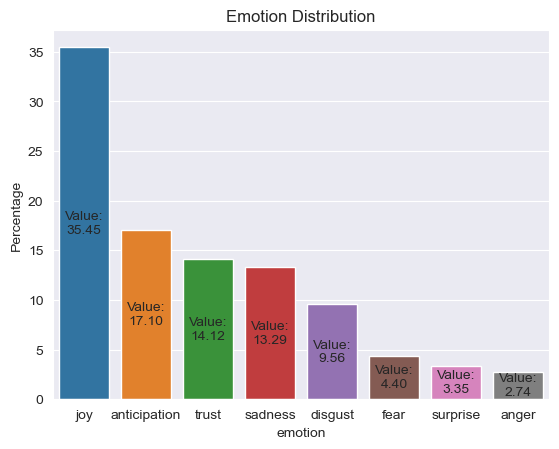

In [71]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# - Reset index of the pandas series - #
# - Then, create dataframe - #
df_g = train_df.groupby(['emotion']).count()['text'].reset_index(name = 'count')
df_p = pd.DataFrame(df_g)

# - Apply formula in count data - #
# - Then create new column - #
df_p['Percentage'] = df_p['count'].apply(lambda x: round(x*100/train_df.shape[0], 3))

# - Plot dataframe using seaborn - #
fig, ax = plt.subplots()
g = sns.barplot(x = df_p.sort_values(by = 'Percentage', ascending=False)['emotion'],
                y = df_p.sort_values(by = 'Percentage', ascending=False)['Percentage'],
                ax = ax)

# - Add annotation - #
ax.bar_label(ax.containers[-1], fmt='Value:\n%.2f', label_type='center')

plt.title('Emotion Distribution')

As you can see from the graph above, this train datasets mostly have 'joy' > 'anticipation' > 'trust' > 'sadness' > 'disgust' > 'fear' > 'surprise' > 'anger' respectively.

It's an imbalance data(class) which is generally normal in classification problem >> so it might affect the prediction's accuracy of the minority class such as 'fear', 'surprise' and 'anger' or we can call this scenario as the classifier may get biased from the majority of this dataset such as 'joy', 'anticipation', 'trust', 'sadness' and 'disgust'. I will explain how to handle this problem in another parts!



---
# 2. Feature Engineering
There are many techniques that we can utilize as a features to train a model such as
- Bag-of-words (BOW)
- Bag-of-words (BOW) + nltk tokenizer
- Term Frequency Inverse Document Frequency (TFIDF)
- etc.

As in the Lab 2 Data Mining, we learned that using only Bag-of-words (BOW) can not capture emoticon of the text data. So I decide to use Bag-of-words (BOW) and using nltk tokenizer which can capture the emoticon of the text.


In this report I use below technique for the Feature Engineering
- Bag-of-words + nltk tokenizer
- Bag-of-words + nltk tokenizer + remove stopwords = 'english'

Let's begin!

In [250]:
# - Split the Raw data first - #
# - Import library - #
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_df['text'], train_df['emotion'], train_size = 0.9)

# - Split Preprocess data - #
X_train_, X_test_, Y_train_, Y_test_ = train_test_split(train_prep_df_df['text'], train_prep_df_df['emotion'], train_size = 0.9)

### Bag-of-words (BOW) + nltk tokenizer
This feature, I input Raw data without preprocess.

In [77]:
# - Import Library - #
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# - Build analyzer (Bag-of-words + nltk tokenizer) - #
BOW_nltk = CountVectorizer(tokenizer = nltk.word_tokenize)

# - Learn a vocabulary dictionary of all tokens in the raw document - #
BOW_nltk.fit(X_train)

# - Transform documents to document-term matrix - #
train_data_BOW_nltk = BOW_nltk.transform(X_train)

# - Check the dimension - #
train_data_BOW_nltk.shape

/Users/karin/opt/miniconda3/envs/dataMining/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1310006, 919370)

In [78]:
# - Observe some feature names - #

feature_names = BOW_nltk.get_feature_names_out()
feature_names[:10]

array(['!', '#', '$', '%', '&', "'", "''", "'-", "'-d", "'/"],
      dtype=object)

### Bag-of-words (BOW) + nltk tokenizer + remove stopwords
This feature, I input data Raw data.

In [79]:
# - Import Library - #
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# - Build analyzer (Bag-of-words + nltk tokenizer + stop_words) - #
BOW_nltk_nn = CountVectorizer(tokenizer = nltk.word_tokenize, stop_words = 'english')

# - Learn a vocabulary dictionary of all tokens in the raw documents - #
BOW_nltk_nn.fit(X_train)

# - Transform documents to document-term matrix - #
train_data_BOW_nltk_nn = BOW_nltk_nn.transform(X_train)

# - Check the dimension - #
train_data_BOW_nltk_nn.shape

/Users/karin/opt/miniconda3/envs/dataMining/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1310006, 919057)

### Bag-of-words (BOW) + nltk tokenizer + remove stopwords
This feature, I input data that already preprocess(clean)

In [251]:
# - Import Library - #
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# - Build analyzer (Bag-of-words + nltk tokenizer + stop_words) - #
BOW_nltk_n = CountVectorizer(tokenizer = nltk.word_tokenize, stop_words = 'english')

# - Learn a vocabulary dictionary of all tokens in the document that already preprocessed - #
BOW_nltk_n.fit(X_train_)

# - Transform documents to document-term matrix - #
train_data_BOW_nltk_n = BOW_nltk_n.transform(X_train_)

# - Check the dimension - #
train_data_BOW_nltk_n.shape

/Users/karin/opt/miniconda3/envs/dataMining/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1310006, 736393)

---
# 3. Model
In my report I utilize 4 models below for predicting the result.
- Fasttext
- DecisionTreeClassifier
- Multinomial Naive Bayes
- Deep Neural Network (DNN)

Let's begin! with the DecisionTreeClassifier

### DecisionTreeClassifier
Using scikit-learn `DecisionTreeClassifier` performs word frequency and uses these as features to train a model.

For this model, I input raw data to train a model.

In [298]:
# - Import Library - #
from sklearn.tree import DecisionTreeClassifier

# - For Classification problem, need to provide both training & testing data - #

# - Train dataset - #
X_train_dt = BOW_nltk_nn.transform(X_train)     # - Transform documents to document-term matrix - #
y_train_dt = Y_train                            # Emotion columns

# - Test dataset - #
X_test_dt = BOW_nltk_nn.transform(X_test)    # - Transform documents to document-term matrix - #
y_test_dt = Y_test                           # Emotion columns

# - Take a look at data dimension is a good habit :) - #
print('X_train.shape: ', X_train_dt.shape)
print('y_train.shape: ', y_train_dt.shape)
print('X_test.shape: ', X_test_dt.shape)
print('y_test.shape: ', y_test_dt.shape)

X_train.shape:  (1310006, 919057)
y_train.shape:  (1310006,)
X_test.shape:  (145557, 919057)
y_test.shape:  (145557,)


In [303]:
# - Build Decision Tree model - #
DT_model = DecisionTreeClassifier(random_state = 1)

# - Training the model - #
DT_model = DT_model.fit(X_train_dt, y_train_dt)

# - Predict the model - #
y_train_pred = DT_model.predict(X_train_dt)
y_test_pred = DT_model.predict(X_test_dt)

# - Take a look at Predicted result - #
y_test_pred[:10]

array(['anticipation', 'fear', 'joy', 'anticipation', 'joy', 'joy',
       'anticipation', 'joy', 'disgust', 'anticipation'], dtype=object)

For below step is a save model step, I do it because I'm afraid that I will lose my predict result.

Just want to back up the model result!

In [307]:
# - Import the library - #
# - For Saving the model - #
import joblib

file_name = 'DecisionTree_model_R.joblib'
joblib.dump(DT_model, file_name)

['DecisionTree_model_R.joblib']

### Multinomial Naive Bayes
Using scikit-learn `MultinomialNB` performs word frequency and uses these as features to train a model.
For this model, I input preprocessed data to train a model.

In [252]:
%%time

# - Import library - #
from sklearn.naive_bayes import MultinomialNB

# - Train dataset - #
X_train_p = BOW_nltk_n.transform(X_train_)  # - Transform documents to document-term matrix - #
y_train_p = Y_train_                      # - Emotion columns - #

# - Test dataset - #
X_test_p = BOW_nltk_n.transform(X_test_)    # - Transform documents to document-term matrix - #
y_test_p = Y_test_                        # - Emotion columns - #

# - Build Multinomial Naive Bayes model - #
M_NB = MultinomialNB()

# - Training the model - #
M_NB.fit(X_train_p, y_train_p)

# - Try predicting the result - #
y_train_pred_1 = M_NB.predict(X_train_p)
y_test_pred_1 = M_NB.predict(X_test_p)

# - Take a look at data - #
y_test_pred_1[:5]

CPU times: user 2min 2s, sys: 1.24 s, total: 2min 3s
Wall time: 2min 4s


array(['joy', 'joy', 'sadness', 'joy', 'anticipation'], dtype='<U12')

In [253]:
# - Import the library - #
# - For Saving the model - #
import joblib

file_name = 'MultinomialNB_model_R.joblib'
joblib.dump(M_NB, file_name)

['MultinomialNB_model_R.joblib']

### FastText
This model I input Raw data for training model.

FastText is an open-source, free, lightweight library that allows users to learn text representations and text classifiers.

This model allows us to provide tune parameter to get better prediction result, I describe the parameter definition as below.
- __lr:__ Learning rate which is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated
- __epoch:__ Number of epoch which epoch is defined as the total number of iterations of  all the training data in one cycle for training the machine learning model
- __wordNgrams:__ Max length of word ngram when creating word vectors for the models, unigrams are used.
- __dim:__ Size of word vector (affect size of FastText model, can be reduced to save space but this can significantly impact performance)

Another things we have to know before using the model is __FastText__ has the pattern that we have follow before input for training data. The pattern show as below.

- text __label__emotion
- Need to use txt format.

In [254]:
# - Create new dataframe with the Raw train data - #
train_fast = train_df[['text', 'emotion']]

# - Take a look at dataframe - #
train_fast

,text,emotion
120006,@Lovato22 Welcome back. Looked like you had a ...,fear
1738326,Today is going to be fun! 👻 <LH>,fear
1699708,@HOPEtogether Thanks! <LH> for my #TwinSoul. P...,anticipation
214790,@jimineedles I can't imagine having to do that...,joy
834732,God has been blessing me so much lately. 🙏🏼✨ <LH>,trust
...,...,...
882360,Remember Lots Wife #MovingForward #NeverLookBa...,anticipation
900639,@Flatz_Maru Lmaoooo my snap rn is literally 20...,sadness
1664833,"happiness is found in simple things, all you ...",joy
1480105,Ok NOW we need a Defense STOP and another TD T...,anticipation


In [255]:
# - Prepare the data for input in FastText model - #
train_fast['fast'] = train_fast['text']+' __label__'+train_fast['emotion']+' '

# - Take a look at dataframe - #
train_fast

/var/folders/q2/hmh52z5125s3w9dq6xzxt4040000gn/T/ipykernel_91496/2930144745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fast['fast'] = train_fast['text']+' __label__'+train_fast['emotion']+' '


,text,emotion,fast
120006,@Lovato22 Welcome back. Looked like you had a ...,fear,@Lovato22 Welcome back. Looked like you had a ...
1738326,Today is going to be fun! 👻 <LH>,fear,Today is going to be fun! 👻 <LH> __label__fear
1699708,@HOPEtogether Thanks! <LH> for my #TwinSoul. P...,anticipation,@HOPEtogether Thanks! <LH> for my #TwinSoul. P...
214790,@jimineedles I can't imagine having to do that...,joy,@jimineedles I can't imagine having to do that...
834732,God has been blessing me so much lately. 🙏🏼✨ <LH>,trust,God has been blessing me so much lately. 🙏🏼✨ <...
...,...,...,...
882360,Remember Lots Wife #MovingForward #NeverLookBa...,anticipation,Remember Lots Wife #MovingForward #NeverLookBa...
900639,@Flatz_Maru Lmaoooo my snap rn is literally 20...,sadness,@Flatz_Maru Lmaoooo my snap rn is literally 20...
1664833,"happiness is found in simple things, all you ...",joy,"happiness is found in simple things, all you ..."
1480105,Ok NOW we need a Defense STOP and another TD T...,anticipation,Ok NOW we need a Defense STOP and another TD T...


In [256]:
# - Convert the data that we prepare to text file - #
train_fast['fast'].to_csv('train_fulltext.txt')

In [257]:
# - Import library - #
import fasttext

# - Parameter tuning - #
lr = 0.01
epoch = 10
wordNgrams = 1

# - Train model using above parameter - #
fasttext_model = fasttext.train_supervised('train_fulltext.txt', lr=lr, epoch=epoch, wordNgrams=wordNgrams)

Read 24M words
Number of words:  2867991
Number of labels: 8
Progress: 100.0% words/sec/thread: 2320640 lr:  0.000000 avg.loss:  1.131836 ETA:   0h 0m 0s


In [258]:
# - Check the label - #
print(fasttext_model.labels)

['__label__joy', '__label__anticipation', '__label__trust', '__label__sadness', '__label__disgust', '__label__fear', '__label__surprise', '__label__anger']


In [259]:
# - Create dataframe for test dataset - #
test_fulltext_df = pd.DataFrame(test_df['text'])

# - Change the column name - #
test_fulltext_df.columns = ['text']

# - Take a look at data - #
test_fulltext_df

,text
140822,2017 has brought me new people and got me clos...
1731792,I’m all for the socials but I believe that the...
781565,@Evan_McMullin Unfortunately most of our Repub...
794061,"Trust yourself, you know more than you think y..."
246460,YEAH MAN! WE WON! ❤️ 2-1 🙌 Hell Of A Game!!! C...
...,...
540801,Just tuned into the American Music Awards long...
1856776,@serenityatsea @AARP Liberal molesters loses j...
62789,The car park machine wouldn't give me a ticket...
81456,@nycjim @EricLiptonNYT Well this ought to conf...


In [260]:
# - Export text data to txt file - #
# - FastText use txt file for prediction - #
test_fulltext_df['text'].to_csv('test_fulltext.txt')

In [264]:
# - Try predicting the result - #
test_fast_pre = fasttext_model.predict('test_fulltext.txt')

In [263]:
# - Try predicting the result in each row - #
test_fulltext_df['emotion_ft'] = test_fulltext_df.text.apply(lambda x: fasttext_model.predict(x))

# - Take a look at data - #
test_fulltext_df

,text,emotion_ft
140822,2017 has brought me new people and got me clos...,"((__label__joy,), [0.5278182625770569])"
1731792,I’m all for the socials but I believe that the...,"((__label__anticipation,), [0.24686695635318756])"
781565,@Evan_McMullin Unfortunately most of our Repub...,"((__label__sadness,), [0.855840802192688])"
794061,"Trust yourself, you know more than you think y...","((__label__trust,), [0.8049038648605347])"
246460,YEAH MAN! WE WON! ❤️ 2-1 🙌 Hell Of A Game!!! C...,"((__label__joy,), [0.666751503944397])"
...,...,...
540801,Just tuned into the American Music Awards long...,"((__label__joy,), [0.3310123682022095])"
1856776,@serenityatsea @AARP Liberal molesters loses j...,"((__label__sadness,), [0.4540470838546753])"
62789,The car park machine wouldn't give me a ticket...,"((__label__sadness,), [0.2821548879146576])"
81456,@nycjim @EricLiptonNYT Well this ought to conf...,"((__label__sadness,), [0.42323341965675354])"


In [265]:
# - Add 'tweet_id' data into dataframe - #
test_fulltext_df['id'] = test_df['tweet_id'].to_list()

# - Take a look at data - #
test_fulltext_df

,text,emotion_ft,id
140822,2017 has brought me new people and got me clos...,"((__label__joy,), [0.5278182625770569])",0x23269c
1731792,I’m all for the socials but I believe that the...,"((__label__anticipation,), [0.24686695635318756])",0x29059f
781565,@Evan_McMullin Unfortunately most of our Repub...,"((__label__sadness,), [0.855840802192688])",0x315521
794061,"Trust yourself, you know more than you think y...","((__label__trust,), [0.8049038648605347])",0x308d1b
246460,YEAH MAN! WE WON! ❤️ 2-1 🙌 Hell Of A Game!!! C...,"((__label__joy,), [0.666751503944397])",0x2487b0
...,...,...,...
540801,Just tuned into the American Music Awards long...,"((__label__joy,), [0.3310123682022095])",0x1d2906
1856776,@serenityatsea @AARP Liberal molesters loses j...,"((__label__sadness,), [0.4540470838546753])",0x23799c
62789,The car park machine wouldn't give me a ticket...,"((__label__sadness,), [0.2821548879146576])",0x2222bb
81456,@nycjim @EricLiptonNYT Well this ought to conf...,"((__label__sadness,), [0.42323341965675354])",0x387f17


In [266]:
# - Create 'emotion' column - #
# - Which will store emotion predicted data - #
test_fulltext_df['emotion'] = test_fulltext_df.emotion_ft.apply(lambda x: re.sub('__+[a-z]+__', '', x[0][0]))

# - Take a look at data - #
test_fulltext_df

,text,emotion_ft,id,emotion
140822,2017 has brought me new people and got me clos...,"((__label__joy,), [0.5278182625770569])",0x23269c,joy
1731792,I’m all for the socials but I believe that the...,"((__label__anticipation,), [0.24686695635318756])",0x29059f,anticipation
781565,@Evan_McMullin Unfortunately most of our Repub...,"((__label__sadness,), [0.855840802192688])",0x315521,sadness
794061,"Trust yourself, you know more than you think y...","((__label__trust,), [0.8049038648605347])",0x308d1b,trust
246460,YEAH MAN! WE WON! ❤️ 2-1 🙌 Hell Of A Game!!! C...,"((__label__joy,), [0.666751503944397])",0x2487b0,joy
...,...,...,...,...
540801,Just tuned into the American Music Awards long...,"((__label__joy,), [0.3310123682022095])",0x1d2906,joy
1856776,@serenityatsea @AARP Liberal molesters loses j...,"((__label__sadness,), [0.4540470838546753])",0x23799c,sadness
62789,The car park machine wouldn't give me a ticket...,"((__label__sadness,), [0.2821548879146576])",0x2222bb,sadness
81456,@nycjim @EricLiptonNYT Well this ought to conf...,"((__label__sadness,), [0.42323341965675354])",0x387f17,sadness


In [267]:
# - Export to csv data for submitting in Kaggle - #
test_fulltext_df[['id', 'emotion']].to_csv('Kaggle_submission.csv', index = False)

### Deep Neural Network (DNN)
We use Keras to be our deep learning framework, and follow the Model (functional API) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend.

I input preprocess data (clean data) into this model.

__** Note **__: I normally run a code on MacOS which can not install keras, I run in another laptop so in this model I can not execute a code but I will show some of the result that can run on MacOS and which I get it from another laptop.

Let's begin!


In [ ]:
%%time
# - Deal with categorical label - #
# - Deal with label (string -> one-hot) - #

# - Import library - #
import keras
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# - Build LabelEncoder - #
# - Which change Non-numerical to numerical - #
label_encoder = LabelEncoder()   # Non-numerical to numerical
label_encoder.fit(Y_train_)

# - Function: Encode character format to specialize format 0 #
def label_encode(le, labels):
    enc = le.transform(labels)
    return to_categorical(enc)

# - Function: Decode specialize format to character format - #
def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, Y_train_)
y_test = label_encode(label_encoder, Y_test_)

In [ ]:
# - Build a model - #

# - Import library - #
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# - I/O check - #
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

# - Input layer - #
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# - 1st hidden layer - #
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# - 2nd hidden layer - #
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# - Output layer - #
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# - Create model - #
model = Model(inputs=[model_input], outputs=[model_output])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# - Show model construction - #
model.summary()

In [ ]:
# - Train - #

# - Import library - #
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')   # Keep data in CSVLogger.

# - Training Setting - #
epochs = 25      # Iterate 25 times
batch_size = 32  # Pass 32 sample in 1 times

# - Training! - #
history = model.fit(X_train_, Y_train_,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test_, Y_test_))  # callback >> save to csv_logger
print('training finish')

In [ ]:
# - Predict on Testing data - #

pred_result = model.predict(X_test_)
pred_result

In [ ]:
# - Decode to make it human understanding - #

pred_result = label_decode(label_encoder, pred_result)
pred_result

---
# 4. Result

### DecisionTreeClassifier

In [316]:
# - Get accuracy - #
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train_dt, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test_dt, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 1.0
testing accuracy: 0.48


In [310]:
# - Create Classification report - #
# - precision, recall , f1-score - #

# - Import library - #
from sklearn.metrics import classification_report
print(classification_report(y_true = y_test_dt, y_pred = y_test_pred))

              precision    recall  f1-score   support

       anger       0.34      0.22      0.27      3902
anticipation       0.50      0.49      0.49     24888
     disgust       0.35      0.30      0.32     13847
        fear       0.46      0.36      0.40      6340
         joy       0.54      0.67      0.60     51940
     sadness       0.42      0.41      0.42     19229
    surprise       0.36      0.22      0.28      4753
       trust       0.40      0.32      0.35     20658

    accuracy                           0.48    145557
   macro avg       0.42      0.37      0.39    145557
weighted avg       0.47      0.48      0.47    145557



In [313]:
# - Confusion Matrix - #

# - Import library - #
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test_dt, y_pred=y_test_pred)

# - Function for visualizing Confusion_matrix - #
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    # Add into matrix ?? >> Need confirm.

    # Show the title and labels #
    sns.set(font_scale = 2)
    fig, ax = plt.subplots(figsize=(20,20))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)    # Display data as an image
    ax.figure.colorbar(im, ax=ax)                             # Add color bar in our plot.
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    # Give the number inside the confusion matrix #
    fmt = 'd'                # integer presentation type ('d')
    thresh = cm.max() / 2.   # Thresholds; Above threshold == white font, Below threshold == black font.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):   # Show number in each of labels.
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

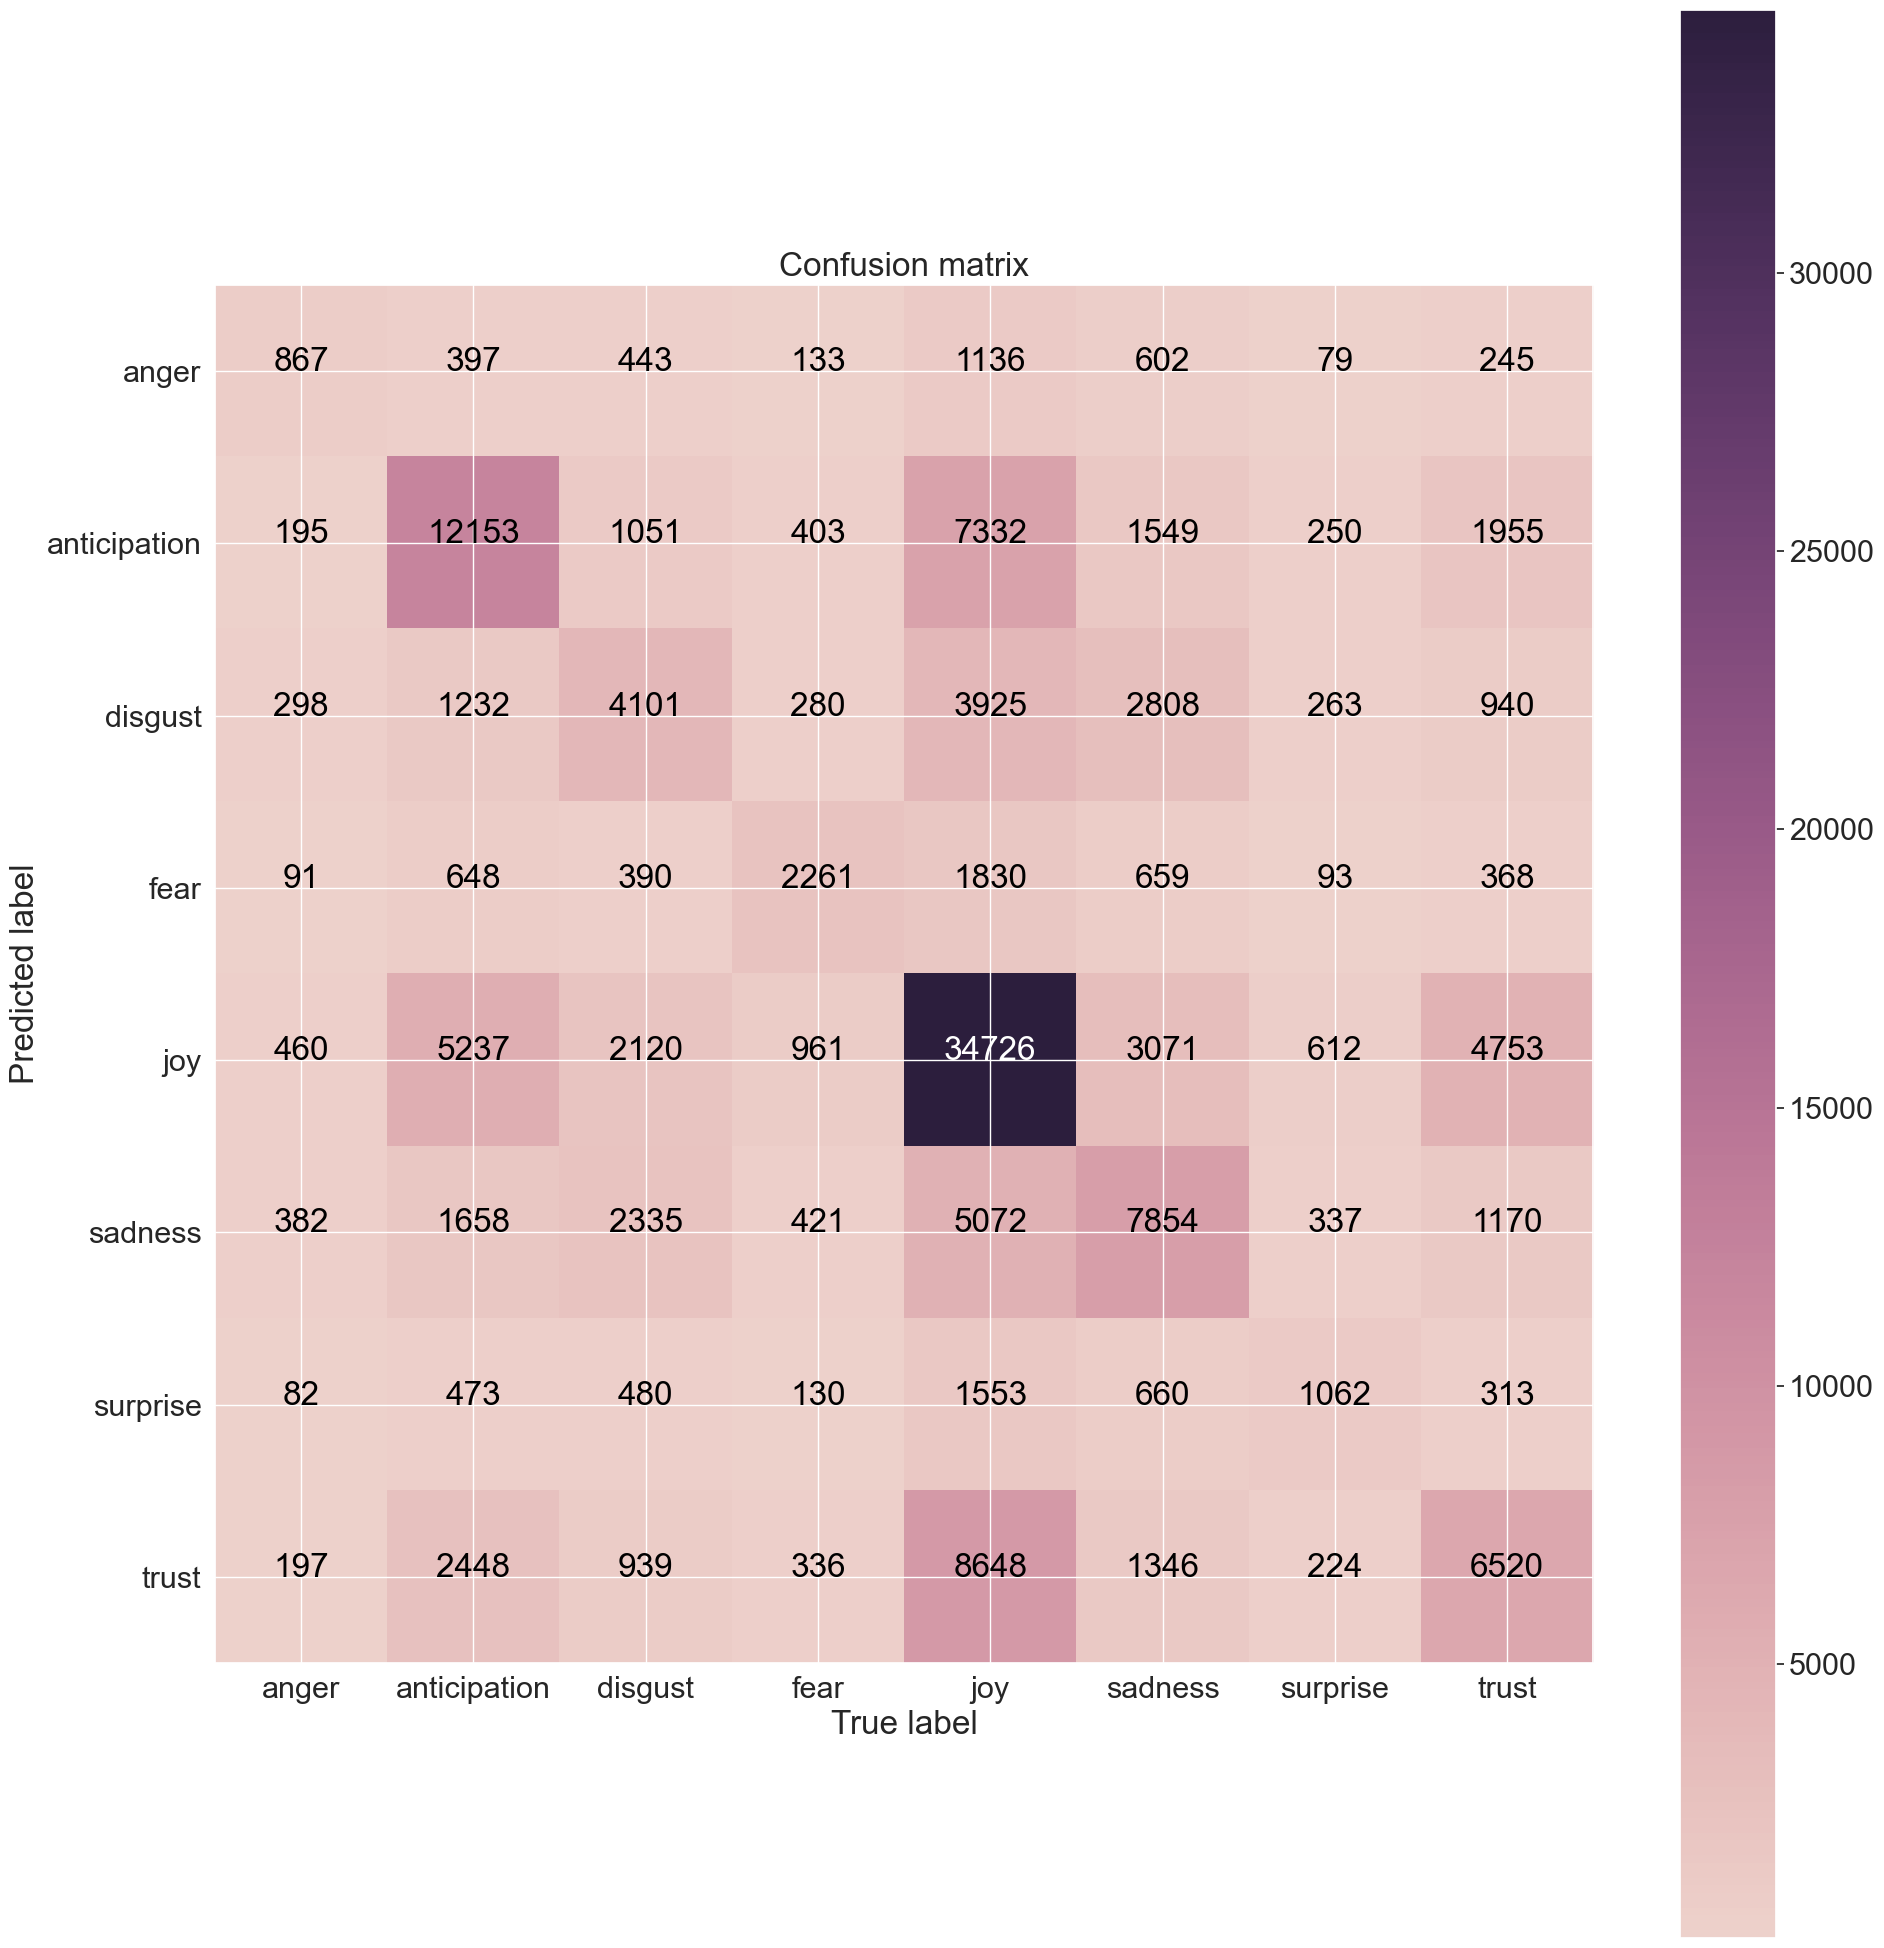

In [314]:
# - Plot Confusion Matrix - #
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')
plt.show()

### Multinomial Naive Bayes

In [317]:
# - Get accuracy - #
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train_p, y_pred=y_train_pred_1)
acc_test = accuracy_score(y_true=y_test_p, y_pred=y_test_pred_1)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.6
testing accuracy: 0.52


In [306]:
# - Create Classification report - #
# - precision, recall , f1-score - #

# - Import library - #
from sklearn.metrics import classification_report
print(classification_report(y_true = y_test_p, y_pred = y_test_pred_1))

              precision    recall  f1-score   support

       anger       0.99      0.08      0.15      4036
anticipation       0.60      0.50      0.55     24758
     disgust       0.54      0.30      0.39     13715
        fear       0.95      0.16      0.27      6358
         joy       0.50      0.86      0.63     51731
     sadness       0.48      0.47      0.48     19367
    surprise       0.98      0.09      0.17      4932
       trust       0.62      0.21      0.31     20660

    accuracy                           0.52    145557
   macro avg       0.71      0.34      0.37    145557
weighted avg       0.59      0.52      0.48    145557

              precision    recall  f1-score   support

       anger       0.99      0.08      0.15      4036
anticipation       0.60      0.50      0.55     24758
     disgust       0.54      0.30      0.39     13715
        fear       0.95      0.16      0.27      6358
         joy       0.50      0.86      0.63     51731
     sadness       0.48 

In [296]:
# - Confusion Matrix - #

# - Import library - #
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test_p, y_pred=y_test_pred_1)

# - Function for visualizing Confusion_matrix - #
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    # Add into matrix ?? >> Need confirm.

    # Show the title and labels #
    sns.set(font_scale = 2)
    fig, ax = plt.subplots(figsize=(20,20))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)    # Display data as an image
    ax.figure.colorbar(im, ax=ax)                             # Add color bar in our plot.
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    # Give the number inside the confusion matrix #
    fmt = 'd'                # integer presentation type ('d')
    thresh = cm.max() / 2.   # Thresholds; Above threshold == white font, Below threshold == black font.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):   # Show number in each of labels.
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

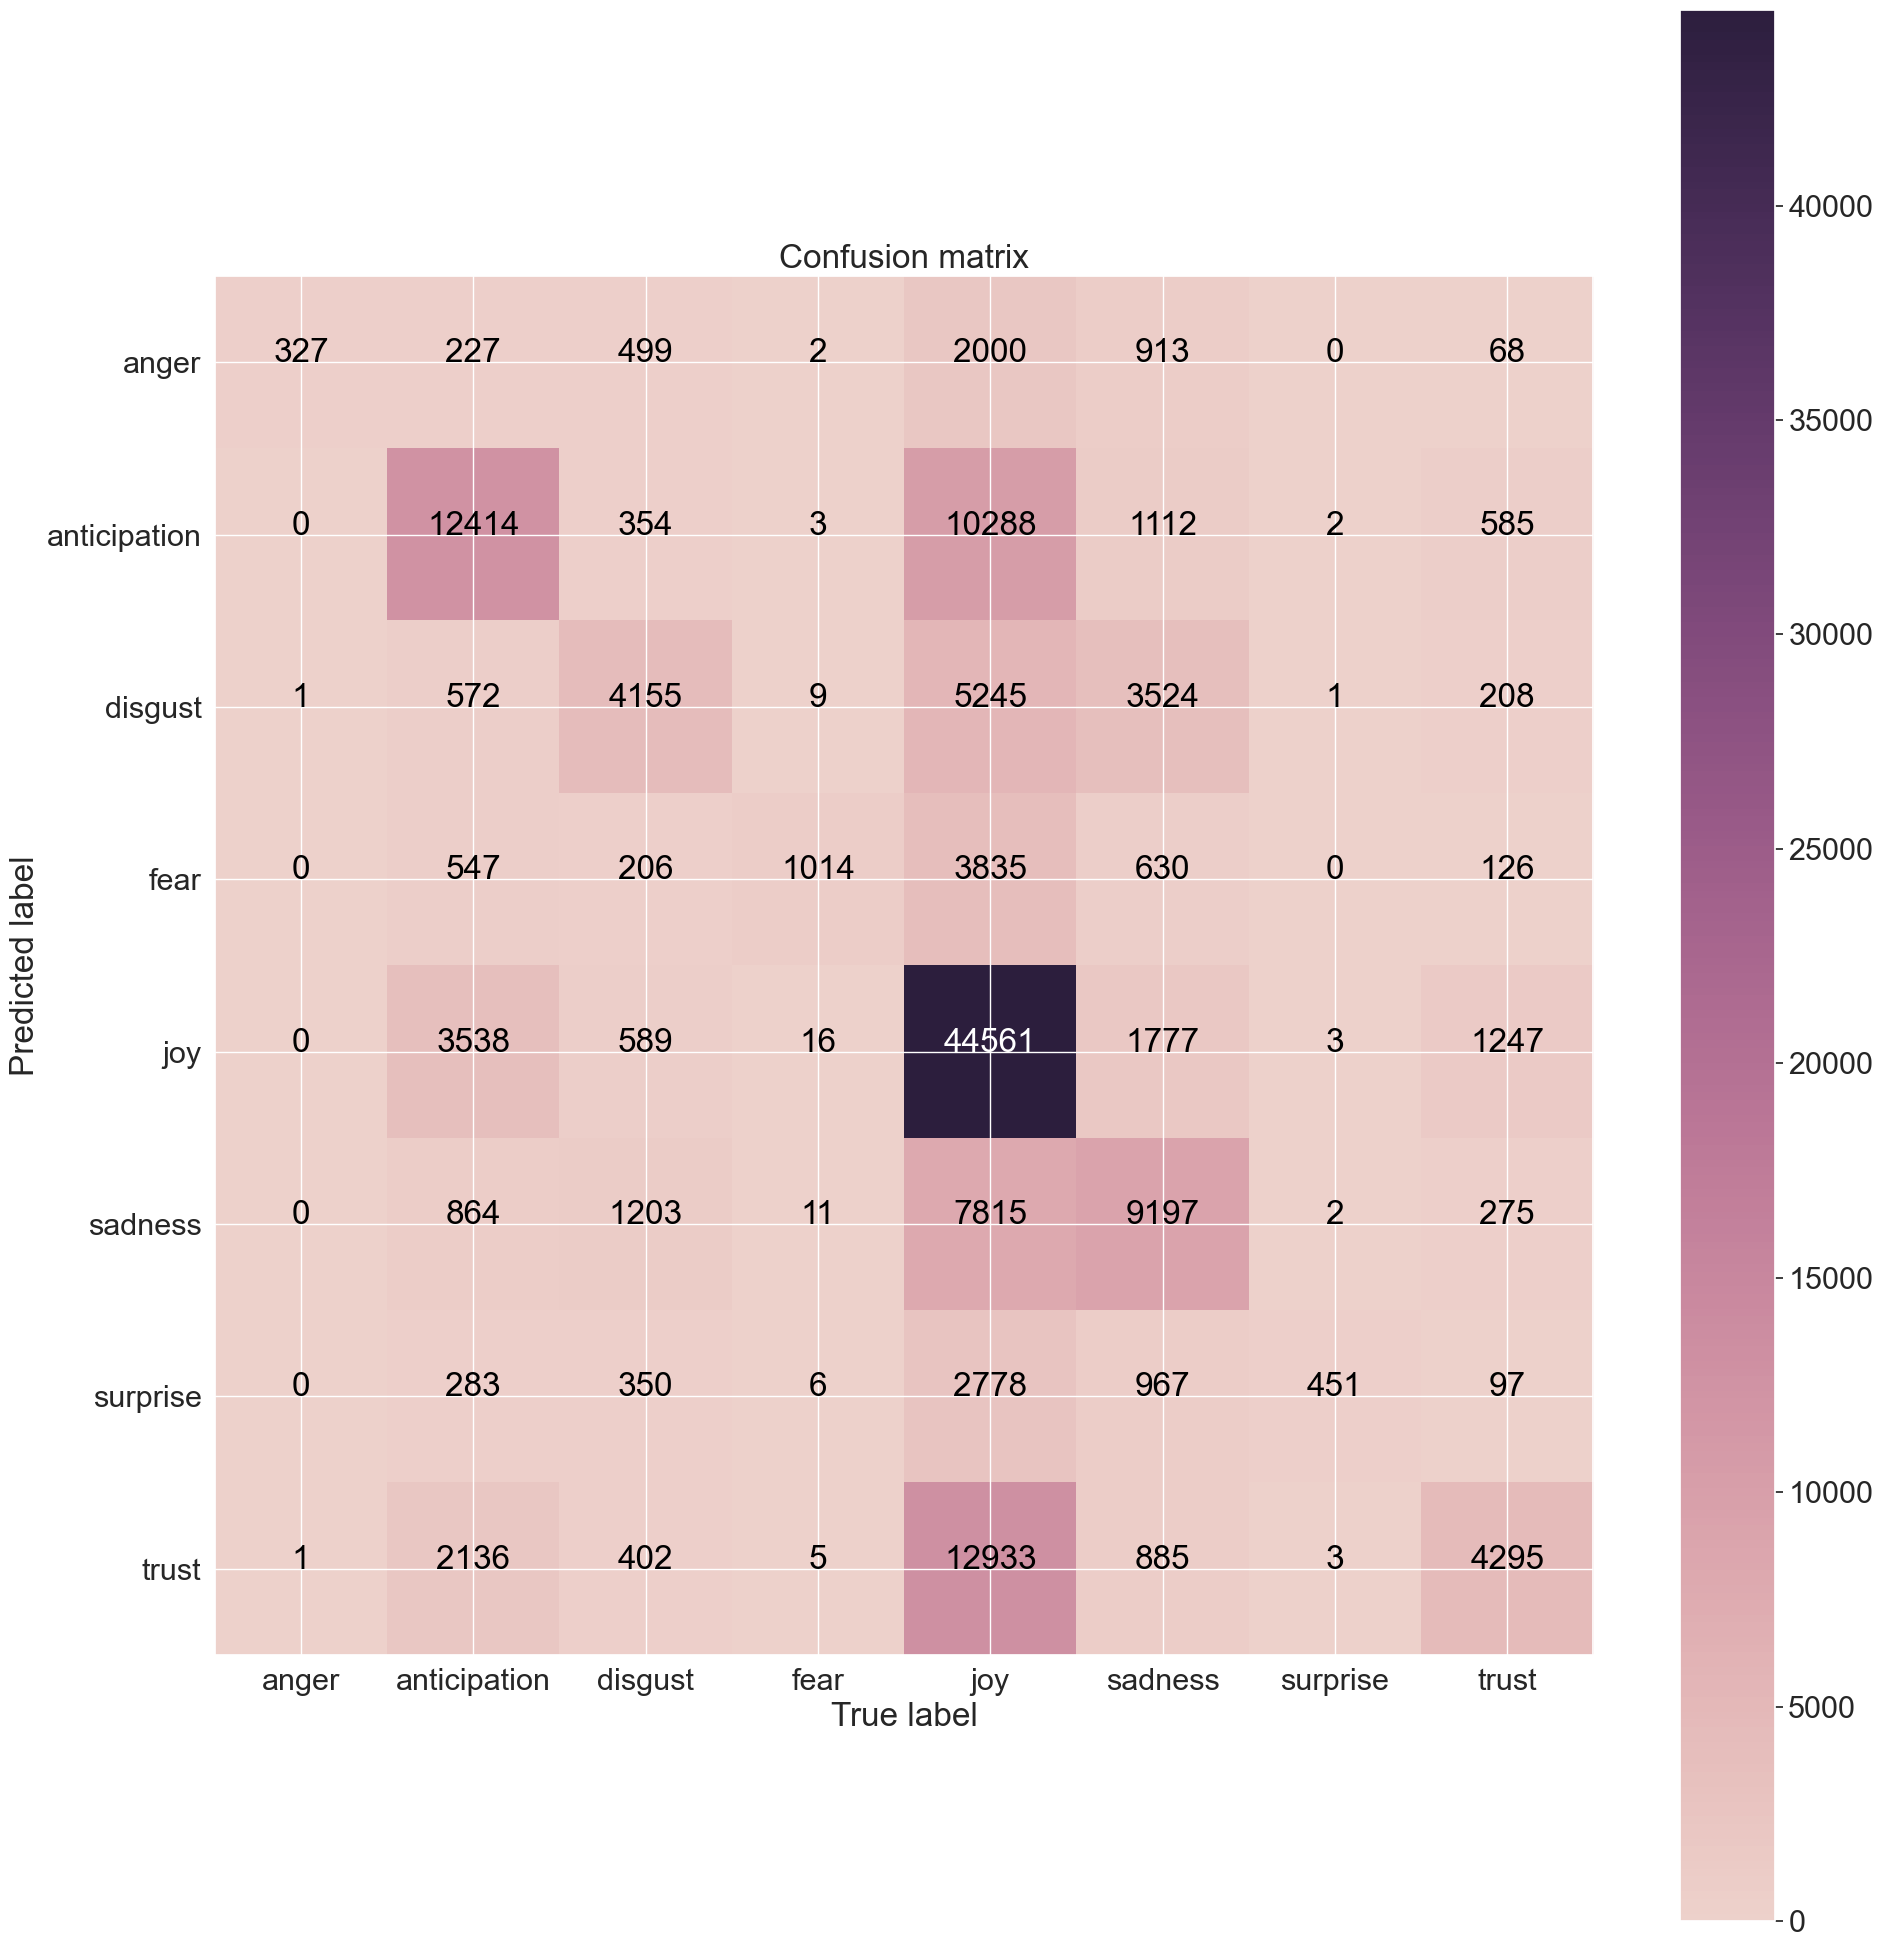

In [297]:
# - Plot Confusion Matrix - #
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')
plt.show()

### FastText

In [275]:
# - Get accuracy - #

acc_result_train = fasttext_model.test('train_fulltext.txt')
print('Training Accuracy : %f' %acc_result_train[1])

Training Accuracy : 0.751026


### Deep Learning(DNN)

In [ ]:
# - Import library - #
from sklearn.metrics import accuracy_score

# - Show the testing accuracy - #
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.52

In [301]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.560198,1.216488,0.573810,1.174606
1,1,0.640137,1.007645,0.579924,1.180078
2,2,0.700718,0.851060,0.575259,1.239073
3,3,0.746242,0.731953,0.563443,1.350038
4,4,0.776731,0.648667,0.559513,1.412866
5,5,0.798559,0.588317,0.558936,1.486335
6,6,0.814642,0.543110,0.552340,1.557102
7,7,0.826958,0.508341,0.546707,1.625196
8,8,0.836785,0.479659,0.547964,1.635605
9,9,0.844788,0.456629,0.541376,1.706523


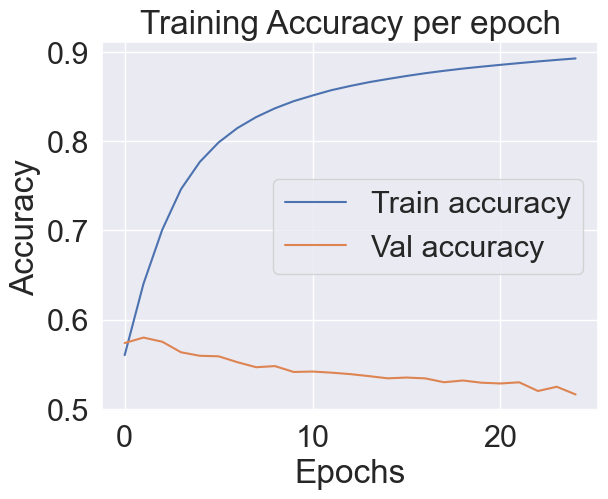

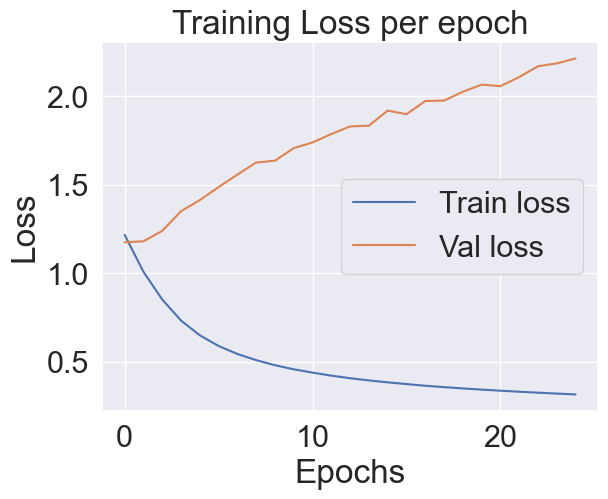

In [308]:
# - Plot Training Accuracy per epoch - #
import matplotlib.pyplot as plt

training_log[['accuracy', 'val_accuracy']].plot(kind = 'line', title = 'Training Accuracy per epoch',
                                                rot = 0, xlabel = 'Epochs', ylabel = 'Accuracy')

plt.legend(['Train accuracy', 'Val accuracy'])

# - Plot Training Loss per epoch - #

training_log[['loss', 'val_loss']].plot(kind = 'line', title = 'Training Loss per epoch',
                                        rot = 0, xlabel = 'Epochs', ylabel = 'Loss')
plt.legend(['Train loss', 'Val loss'])

---
# 5. Conclusion
I conclude 3 items as below.

- Deep Learning (DNN) that I have try with epoch = 25, I monitor the result and found out that it's overfitting. The training accuracy is so accurate but testing data accuracy is not accurate. Result is 0.3919. After I detected that its overfitting I reduced the training and the result is getting better 0.39468. This model spend a lot of time (1 days) but the result is not good.
- FastText earn the best %result that I submitted which is spend less time and earn good result.
- Twitter's text dataset is not clean and messy, to get a better result preprocessing step is the important step that we have to care. (FastText has feature Engineering inside the model, I know why the preprocessing step is important because I input 2 dataset which is the data that already preprocess and raw data. The result show as below. Clean data that I manually preprocess got the bad result compared with the raw data that clean by FastText.

    - Raw data + FastText => 0.43 ~ 0.46
    - Clean text (Manually) + FastText => 0.36132 ~ 0.36304

Summary of my Kaggle submission result:
- DecisionTreeClassifier + Raw data (NLTK) : 0.33519
- Multinomial Naive Bayes + Preprocessed data (NLTK) : 0.44489
- FastText + Preprocessed data (manually) : 0.36132 ~ 0.36304
- FastText + Raw data + Tuning Parameter : 0.4374 ~ 0.4708 >> __Best Result__

---
# 6. Things I want to try

- As I explained in #1.3 Exploratory Data Analysis (EDA), that our datasets is an imbalance data(class) so it might affect the prediction accuracy to handle this problem, I want to use SMOTE (Synthetic Minority Oversampling Technique) which will adding duplicate records of minority class so the all label's size will be the same, so it will handle this imbalance dataset and improve prediction accuracy.
- Try roBERTa or BERT model which I researched that in Twitter Sentiment Analysis of these 2 models, showing F1 and accuracy scores around 90 %
- Try different Feature Engineering such as TFIDF, and Word2Vec
- Spend more time in data preprocessing (To get better quality of data)

---